In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# laoding file from stored processed data set from previous analysis
datamart_rfm = pd.read_pickle(os.path.join("..","datamart_rfm.pickle"))

In [3]:
# top5 rows of the dataset
datamart_rfm.head()

,Recency,Frequency,MonetoryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0,Bronze
12347.0,2,182,4310.00,4,4,4,444,12.0,Gold
12348.0,75,31,1797.24,2,2,4,224,8.0,Silver
12349.0,19,73,1757.55,3,3,4,334,10.0,Gold
12350.0,310,17,334.40,1,1,2,112,4.0,Bronze


In [4]:
# shape of the dataset
datamart_rfm.shape

(4372, 9)

### Calculate statistics of Variable

In [5]:
# Print the average values of the variables in the dataset
print(datamart_rfm.mean())

# Print the standard deviation of the variables in the dataset
print(datamart_rfm.std())

# Get the key statistics of the dataset
print(datamart_rfm.describe())

Recency            92.047118
Frequency          93.053294
MonetoryValue    1898.459701
R                   2.514181
F                   2.487420
M                   2.500000
RFM_Segment              inf
RFM_Score           7.501601
dtype: float64
Recency           100.765435
Frequency         232.471608
MonetoryValue    8219.345141
R                   1.124804
F                   1.119114
M                   1.118162
RFM_Score           2.828144
dtype: float64
           Recency    Frequency  MonetoryValue    RFM_Score
count  4372.000000  4372.000000    4372.000000  4372.000000
mean     92.047118    93.053294    1898.459701     7.501601
std     100.765435   232.471608    8219.345141     2.828144
min       1.000000     1.000000   -4287.630000     3.000000
25%      17.000000    17.000000     293.362500     5.000000
50%      50.000000    42.000000     648.075000     7.000000
75%     143.000000   102.000000    1611.725000    10.000000
max     374.000000  7983.000000  279489.020000    12.00

# Data Preprocessing for K-means

## Managing skewed variables

### Exploring distribution of Recency

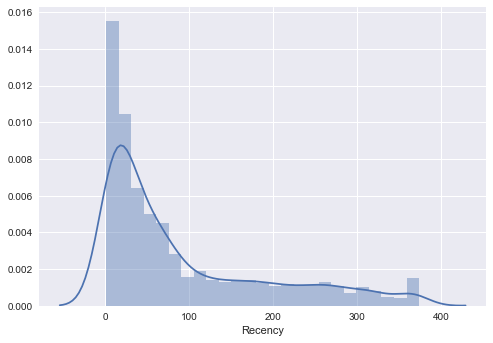

In [6]:
sns.distplot(datamart_rfm['Recency']) # infrence recency distribution has tail on the right that means its skewed
plt.show()

### Exploring distribution of Frequency 

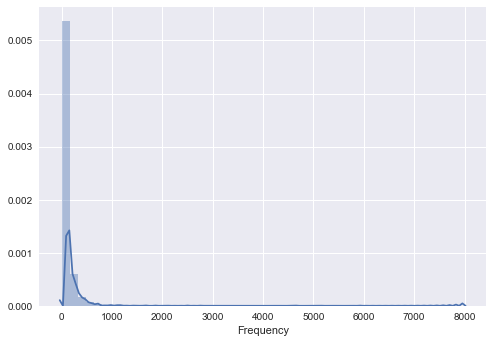

In [7]:
sns.distplot(datamart_rfm['Frequency'])  # infrence recency distribution has tail on the right that means its skewed even worse
plt.show()

## Data Transformation to manage skewness

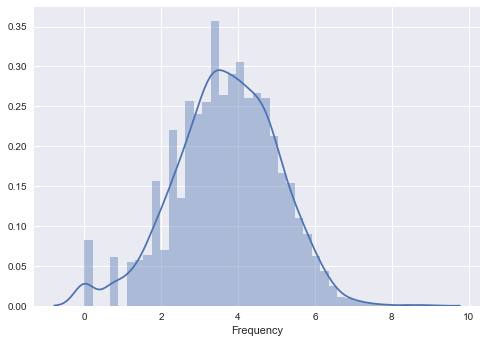

In [8]:
# applying logarithmin transformation(+ve values only)
frequency_log = np.log(datamart_rfm['Frequency'])

sns.distplot(frequency_log)
plt.show()

## Centering and scaling variables

In [9]:
datamart_rfm.describe()

,Recency,Frequency,MonetoryValue,RFM_Score
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,92.047118,93.053294,1898.459701,7.501601
std,100.765435,232.471608,8219.345141,2.828144
min,1.000000,1.000000,-4287.630000,3.000000
25%,17.000000,17.000000,293.362500,5.000000
50%,50.000000,42.000000,648.075000,7.000000
75%,143.000000,102.000000,1611.725000,10.000000
max,374.000000,7983.000000,279489.020000,12.000000


In [10]:
datamart_rfm.drop('RFM_Score', axis=1, inplace=True)

In [11]:
datamart_rfm1 = datamart_rfm.drop('R', axis=1, inplace=True)
datamart_rfm1 = datamart_rfm.drop('F', axis=1, inplace=True)
datamart_rfm1 = datamart_rfm.drop('M', axis=1, inplace=True)
datamart_rfm1 = datamart_rfm.drop('RFM_Segment', axis=1, inplace=True)
datamart_rfm1 = datamart_rfm.drop('General_Segment', axis=1, inplace=True)

In [12]:
datamart_rfm.head()

,Recency,Frequency,MonetoryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [13]:
# Centering variables with diffrent means
# K-means works well on variables with the same mean
# Centering variables is done by subtracting average value from each observation

datamart_centered = datamart_rfm - datamart_rfm.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,MonetoryValue
count,4372.00,4372.00,4372.00
mean,0.00,0.00,-0.00
std,100.77,232.47,8219.35
min,-91.05,-92.05,-6186.09
25%,-75.05,-76.05,-1605.10
50%,-42.05,-51.05,-1250.38
75%,50.95,8.95,-286.73
max,281.95,7889.95,277590.56


### Scaling varibales with diffrent variance

In [14]:
# K-means works better on variables with the same variance / standard deviation
# Scaling variables is done by dividing them  by standard deviation of each
datamart_scaled = datamart_rfm / datamart_rfm.std()
datamart_scaled.describe().round(2)

,Recency,Frequency,MonetoryValue
count,4372.00,4372.00,4372.00
mean,0.91,0.40,0.23
std,1.00,1.00,1.00
min,0.01,0.00,-0.52
25%,0.17,0.07,0.04
50%,0.50,0.18,0.08
75%,1.42,0.44,0.20
max,3.71,34.34,34.00


## Combining centering and scaling

In [15]:
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)

print('mean:  ', datamart_normalized.mean(axis=0).round(2))
print('std:  ', datamart_normalized.std(axis=0).round(2))

mean:   [-0.  0. -0.]
std:   [ 1.  1.  1.]


## Pre-processing pipline

### Visualize RFM distributions

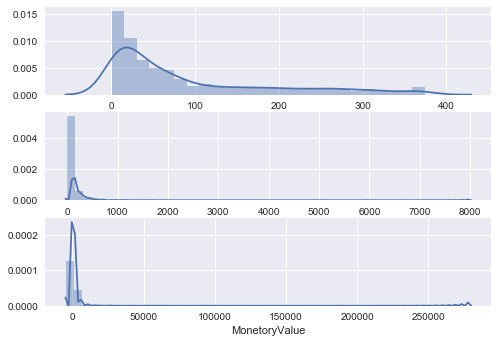

In [16]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetoryValue'])

# Show the plot
plt.show()

### Preprocess RFM data

In [17]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetoryValue'])

# Show the plot
plt.show()